In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt
from munch import Munch
from scipy.linalg import eigvalsh

from QO.general import vec2
from QO.hamiltonians import k_space_H, eigs_over_k

import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 4.0)

from QO.thermodynamics import GCP_contributions, GCP


Doing a sweep over L_x producing a sweep over B
L_x = [99 96 92 89 86 83 80 77 75 73 71 69 67 65 63 62 60 59 57 56 55 54 52 51
 50 49 48 47 46 46 45 44 43 42 42 41 40 40 39 38 38 37 37 36 35 35 34 34
 34 33 33 32 32 31 31 31 30 30 29 29 29 28 28 28 27 27 27 26 26 26 26 25
 25 25 25 24 24 24 24 23 23 23 23 22 22 22 22 22 21 21 21 21 21 21 20 20
 20 20 20 20]




/Users/tom/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide


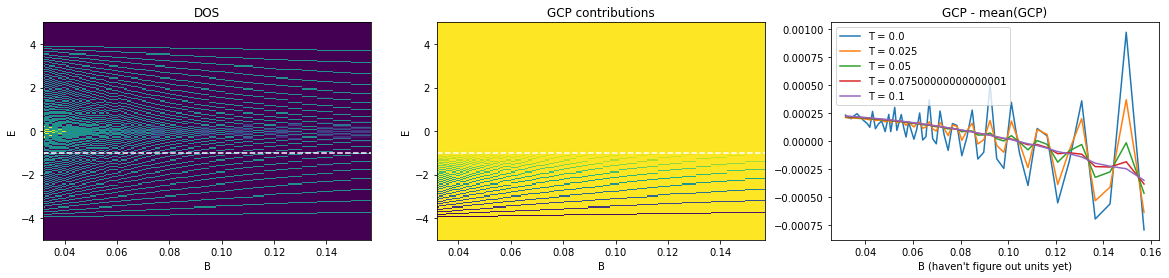

In [2]:
phi = np.linspace(np.pi / 50, np.pi / 10, 100)
L_x = np.array(2*np.pi / phi, dtype = int)

print(f"""
Doing a sweep over L_x producing a sweep over B
L_x = {L_x}

""")
#L_x = np.arange(1,50,1)

params = Munch(
#hopping parameters in each direction
t = vec2(1,1),

#size of the magnetic unit cell in each direction, L_y = 2 and large L_x means small magenetic field
#L = vec2(10,1),

#the number of unit cells to tile in each direction
N = vec2(5, 5),
)  

bins = np.linspace(-5,5,200)
mu = -1
T = 0
Ts = np.linspace(0,.1,5)
B = np.pi / L_x

DOS = np.zeros((L_x.size, bins.size - 1))
contribs = np.zeros((L_x.size, bins.size - 1))
GCPs = np.zeros([len(Ts), len(L_x)])
for i, lx in enumerate(L_x):
    eigs = eigs_over_k(k_space_H, L = vec2(lx, 1), **params)
    DOS[i], _ = np.histogram(eigs, bins)
    contribs[i] = DOS[i] * GCP_contributions(bins, mu = mu, T = T)[:-1]
    
    for j,T in enumerate(Ts):
        GCPs[j, i] = GCP(eigs, mu, T)

#


dGCP = np.diff(GCPs, axis = -1)
dB = np.diff(B)
M = - dGCP / dB

f, axes = plt.subplots(ncols = 3, figsize = (20,4))
axes[0].pcolormesh(B, bins, DOS.T)
axes[0].hlines(y = mu, xmin = min(B), xmax = max(B), label = 'mu', linestyle = '--', color = 'white')
axes[0].set(ylabel = 'E', xlabel = 'B', title = 'DOS')

axes[1].pcolormesh(B, bins, contribs.T)
axes[1].hlines(y = mu, xmin = min(B), xmax = max(B), label = 'mu', linestyle = '--', color = 'white')
axes[1].set(ylabel = 'E', xlabel = 'B', title = 'GCP contributions')


for j, T in enumerate(Ts):
    axes[2].plot(B[:], GCPs[j] - np.mean(GCPs[j]), label = f"T = {T}")
axes[2].set(xlabel = "B (haven't figure out units yet)", title = "GCP - mean(GCP)")
#     axes[3].plot(B[:-1], M[j])
    
axes[2].legend()


min_phi, max_phi = (0.010471975511965976, 0.3141592653589793)
min_L_x, max_L_x = (3.0, 96.0)
N = 10


Doing a sweep over L_x producing a sweep over B
L_x = [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74
 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95]




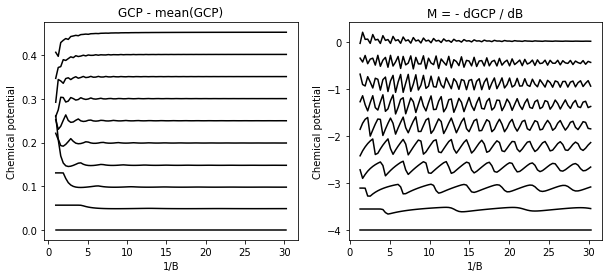

In [3]:
min_phi, max_phi = np.pi / 300, np.pi / 10
min_L_x, max_L_x = np.floor(1 / max_phi), np.ceil(1 / min_phi)
N = 10

print(f"""
min_phi, max_phi = {min_phi, max_phi}
min_L_x, max_L_x = {min_L_x, max_L_x}
N = {N}
""")
L_x = np.arange(min_L_x, max_L_x, dtype = int)

print(f"""
Doing a sweep over L_x producing a sweep over B
L_x = {L_x}

""")
#L_x = np.arange(1,50,1)

params = Munch(
#hopping parameters in each direction
t = vec2(1,1),

#size of the magnetic unit cell in each direction, L_y = 2 and large L_x means small magenetic field
#L = vec2(10,1),

#the k_x and y in real space at which to evaluate the hamiltionian
#k = vec2(0,0),

#the number of unit cells to tile in each direction
N = vec2(5, 5),
)  

bins = np.linspace(-5,5,200)
mu = -1
T = 0.01
B = np.pi / L_x
Mus = np.linspace(-4,0,10)

GCPs = np.zeros([len(Mus), len(L_x)])

for i, lx in enumerate(L_x):
    eigs = eigs_over_k(k_space_H, L = vec2(lx, 1), **params)
    for j, mu in enumerate(Mus):
        GCPs[j, i] = GCP(eigs, mu, T)



dGCP = np.diff(GCPs, axis = -1)
dB = np.diff(B)
M = - dGCP / dB

f, axes = plt.subplots(ncols = 2, figsize = (10,4))

for j, mu in enumerate(Mus):
    axes[0].plot(B[:]**-1, GCPs[j] - np.mean(GCPs[j]) + 0.05*j, label = f"$\mu$ = {mu}", color = 'k')
    
axes[0].set(xlabel = "1/B", title = "GCP - mean(GCP)")
    
for j, mu in enumerate(Mus):
    axes[1].plot(B[1:]**-1, M[j] + mu, label = f"$\mu$ = {mu}", color = 'k')
    
axes[1].set(xlabel = "1/B", title = "M = - dGCP / dB")
for a in axes:
    a.set(ylabel = "Chemical potential")
f.savefig("GCP_oscillations.png")


min_phi, max_phi = (0.006283185307179587, 0.3141592653589793)
min_L_x, max_L_x = (3.0, 160.0)
N = 10


Doing a sweep over L_x producing a sweep over B

.............................................................................................................................................................(100, 156) (100,) (100, 79) (79,)
(100, 156) (100,) (100, 79) (79,)
(100, 156) (100,) (100, 79) (79,)


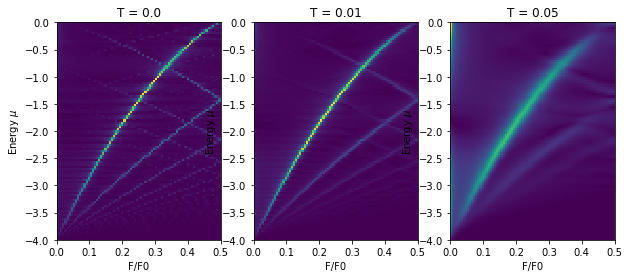

In [4]:
from itertools import count

min_phi, max_phi = np.pi / 500, np.pi / 10
min_L_x, max_L_x = np.floor(1 / max_phi), np.ceil(1 / min_phi)

print(f"""
min_phi, max_phi = {min_phi, max_phi}
min_L_x, max_L_x = {min_L_x, max_L_x}
N = {N}
""")
L_x = np.arange(min_L_x, max_L_x, dtype = int)

print(f"""
Doing a sweep over L_x producing a sweep over B
""")
#L_x = np.arange(1,50,1)

params = Munch(
#hopping parameters in each direction
t = vec2(1,1),

#size of the magnetic unit cell in each direction, L_y = 2 and large L_x means small magenetic field
#L = vec2(10,1),

#the k_x and y in real space at which to evaluate the hamiltionian
#k = vec2(0,0),

#the number of unit cells to tile in each direction
N = vec2(10, 10),
)  

bins = np.linspace(-5,5,200)
Mus = np.linspace(-4,0,100)
Ts = np.array([0,0.01,0.05])
mu = -1

B = np.pi / L_x
dB = np.diff(B)
N = len(B)

GCPs = np.zeros([len(Mus), len(L_x), len(Ts)])

for i, lx in enumerate(L_x):
    print('.', end = '')
    eigs = eigs_over_k(k_space_H, L = vec2(lx, 1), **params)
    
    for j, mu in enumerate(Mus):
        for k, T in enumerate(Ts):
            GCPs[j, i, k] = GCP(eigs, mu, T)


f, axes = plt.subplots(ncols = len(Ts), figsize = (10,4))
   
for k, T, ax in zip(count(), Ts, axes):
    dGCP = np.diff(GCPs[:, :, k], axis = -1)
    
    M = - dGCP / dB

    
    freqs = np.fft.rfftfreq(M.shape[-1])
    ffts = np.fft.rfft(M, axis = -1)
    print(M.shape, Mus.shape, ffts.shape, freqs.shape)

    ax.pcolormesh(freqs, Mus, np.abs(ffts))

    ax.set(ylabel = "Energy $\mu$", xlabel = "F/F0")
    ax.set(title = f'T = {T}')

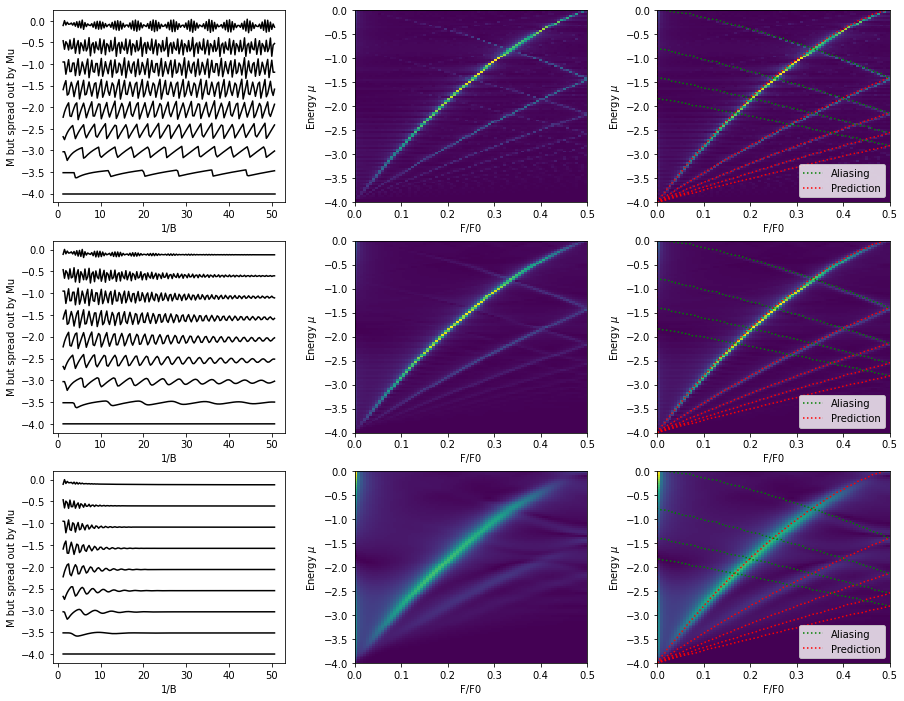

In [5]:
def lattice_dispersion(kx, ky, t = vec2(1,1)): return - 2 * t.x * np.cos(kx) - 2 * t.y * np.cos(ky) 

def FS_area(dispersion, N, E):
    kx = np.linspace(-np.pi, np.pi, N.x)[:, None]
    ky = np.linspace(-np.pi, np.pi, N.y)[None, :]
    sampled_dispersion = dispersion(kx, ky)
    
    dE = E[1] - E[0]
    number_of_states_less_than_E = np.array([np.sum(e > sampled_dispersion) for e in E])
    areas = number_of_states_less_than_E / (N.x * N.y)
    
    return areas

f, axes = plt.subplots(ncols = 3, nrows = len(Ts), figsize = (15,4*len(Ts)), gridspec_kw = dict(wspace = 0.3))

N = len(B)

for k, T, axes in zip(count(), Ts, axes):
    dGCP = np.diff(GCPs[:, :, k], axis = -1)
    M = - dGCP / dB
    
    freqs = np.fft.rfftfreq(M.shape[-1])
    ffts = np.fft.rfft(M, axis = -1)

    for j in range(0, len(Mus), 12):
        mu = Mus[j]
        axes[0].plot(B[1:]**-1, M[j] + mu, label = f"$\mu$ = {mu}", color = 'k')
    
    axes[1].pcolormesh(freqs, Mus, np.abs(ffts))
    axes[2].pcolormesh(freqs, Mus, np.abs(ffts))

    harmonics = 6
    for m in range(harmonics):
        pred, = axes[2].plot(m*FS_area(lattice_dispersion, vec2(100,100), Mus), Mus, color = "red",
                             linestyle = "dotted")

    for m in range(harmonics):
        y = np.linspace(-4, 0, 500)
        x = 1 - m*FS_area(lattice_dispersion, vec2(100,100), y)
        idx = x < 0.5
        aliasing, = axes[2].plot(x[idx], y[idx], color = "green", linestyle = "dotted")

    axes[0].set(ylabel = "M but spread out by Mu", xlabel = "1/B")
    axes[1].set(ylabel = "Energy $\mu$", xlabel = "F/F0", xlim = (0, 0.5))
    axes[2].set(ylabel = "Energy $\mu$", xlabel = "F/F0", xlim = (0, 0.5))

    
    axes[2].legend([aliasing, pred], ["Aliasing", "Prediction", ])
    
f.savefig("one_band.png")